___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

Let's use Numpy to create a simple sine wave.

In [4]:
x = np.linspace(0,50,501)
y = np.cos(x)

In [5]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [6]:
y

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

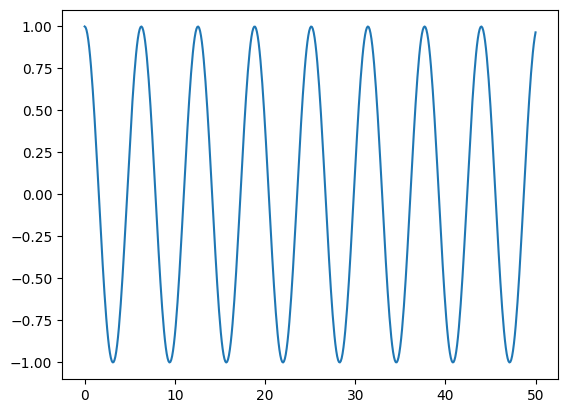

In [7]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [9]:
df = pd.DataFrame(data=y,index=x,columns=['Cos'])

In [10]:
df

,Cos
0.0,1.000000
0.1,0.995004
0.2,0.980067
0.3,0.955336
0.4,0.921061
...,...
49.6,0.786619
49.7,0.844330
49.8,0.893605
49.9,0.933951


## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [11]:
len(df)

501

In [12]:
test_percent = 0.1

In [13]:
len(df)*test_percent

50.1

In [14]:
test_point = np.round(len(df)*test_percent)

In [15]:
test_ind = int(len(df) - test_point)

In [16]:
test_ind

451

In [17]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [18]:
train

,Cos
0.0,1.000000
0.1,0.995004
0.2,0.980067
0.3,0.955336
0.4,0.921061
...,...
44.6,0.815211
44.7,0.753318
44.8,0.683899
44.9,0.607646


In [19]:
test

,Cos
45.1,0.437749
45.2,0.345802
45.3,0.250400
45.4,0.152496
45.5,0.053069
45.6,-0.046889
45.7,-0.146379
45.8,-0.244405
45.9,-0.339990
46.0,-0.432178


## Scale Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [23]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# scaled_train

In [26]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [27]:
len(scaled_train)

451

In [28]:
len(generator) # n_input = 2

449

In [29]:
# scaled_train

In [30]:
# What does the first batch look like?
X,y = generator[0]

In [31]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[1.         0.99750204]
Predict this y: 
 [[0.99003313]]


In [32]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [33]:
# What does the first batch look like?
X,y = generator[0]

In [34]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[1.         0.99750204 0.99003313 0.97766789 0.96052987 0.93879031
 0.91266642 0.88241923 0.84835095 0.81080198]
Predict this y: 
 [[0.77014751]]


In [35]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [37]:
# We're only using one feature in our time series
n_features = 1

In [38]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# fit model
model.fit(generator,epochs=3)

Epoch 1/3
 20/401 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4189

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0571
Epoch 2/3
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.4250e-05
Epoch 3/3
401/401 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.6539e-04


In [43]:
model.history.history.keys()

dict_keys(['loss'])

<Axes: >

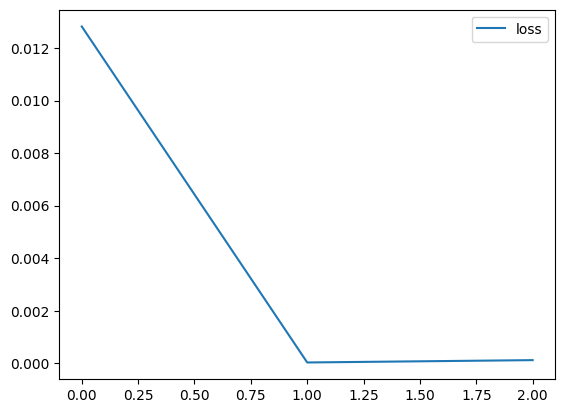

In [44]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [45]:
first_eval_batch = scaled_train[-length:]

In [46]:
first_eval_batch

array([[1.30989552e-01],
       [9.91483002e-02],
       [7.13121465e-02],
       [4.77592209e-02],
       [2.87248565e-02],
       [1.43992384e-02],
       [4.92550334e-03],
       [3.98309814e-04],
       [8.62892023e-04],
       [6.31460802e-03],
       [1.66989861e-02],
       [3.19122689e-02],
       [5.18024504e-02],
       [7.61707944e-02],
       [1.04773821e-01],
       [1.37325737e-01],
       [1.73501295e-01],
       [2.12939042e-01],
       [2.55244927e-01],
       [2.99996245e-01],
       [3.46745855e-01],
       [3.95026651e-01],
       [4.44356227e-01],
       [4.94241697e-01],
       [5.44184623e-01],
       [5.93685992e-01],
       [6.42251203e-01],
       [6.89395007e-01],
       [7.34646360e-01],
       [7.77553124e-01],
       [8.17686591e-01],
       [8.54645758e-01],
       [8.88061344e-01],
       [9.17599469e-01],
       [9.42964999e-01],
       [9.63904491e-01],
       [9.80208723e-01],
       [9.91714788e-01],
       [9.98307723e-01],
       [9.99921653e-01],


In [47]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [48]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[0.69855875]], dtype=float32)

In [49]:
scaled_test[0]

array([0.71887002])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [50]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [51]:
current_batch.shape

(1, 50, 1)

In [52]:
current_batch

array([[[1.30989552e-01],
        [9.91483002e-02],
        [7.13121465e-02],
        [4.77592209e-02],
        [2.87248565e-02],
        [1.43992384e-02],
        [4.92550334e-03],
        [3.98309814e-04],
        [8.62892023e-04],
        [6.31460802e-03],
        [1.66989861e-02],
        [3.19122689e-02],
        [5.18024504e-02],
        [7.61707944e-02],
        [1.04773821e-01],
        [1.37325737e-01],
        [1.73501295e-01],
        [2.12939042e-01],
        [2.55244927e-01],
        [2.99996245e-01],
        [3.46745855e-01],
        [3.95026651e-01],
        [4.44356227e-01],
        [4.94241697e-01],
        [5.44184623e-01],
        [5.93685992e-01],
        [6.42251203e-01],
        [6.89395007e-01],
        [7.34646360e-01],
        [7.77553124e-01],
        [8.17686591e-01],
        [8.54645758e-01],
        [8.88061344e-01],
        [9.17599469e-01],
        [9.42964999e-01],
        [9.63904491e-01],
        [9.80208723e-01],
        [9.91714788e-01],
        [9.9

In [53]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[9.91483002e-02],
        [7.13121465e-02],
        [4.77592209e-02],
        [2.87248565e-02],
        [1.43992384e-02],
        [4.92550334e-03],
        [3.98309814e-04],
        [8.62892023e-04],
        [6.31460802e-03],
        [1.66989861e-02],
        [3.19122689e-02],
        [5.18024504e-02],
        [7.61707944e-02],
        [1.04773821e-01],
        [1.37325737e-01],
        [1.73501295e-01],
        [2.12939042e-01],
        [2.55244927e-01],
        [2.99996245e-01],
        [3.46745855e-01],
        [3.95026651e-01],
        [4.44356227e-01],
        [4.94241697e-01],
        [5.44184623e-01],
        [5.93685992e-01],
        [6.42251203e-01],
        [6.89395007e-01],
        [7.34646360e-01],
        [7.77553124e-01],
        [8.17686591e-01],
        [8.54645758e-01],
        [8.88061344e-01],
        [9.17599469e-01],
        [9.42964999e-01],
        [9.63904491e-01],
        [9.80208723e-01],
        [9.91714788e-01],
        [9.98307723e-01],
        [9.9

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [54]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [55]:
test_predictions

[array([0.69855875], dtype=float32),
 array([0.6514538], dtype=float32),
 array([0.60606647], dtype=float32),
 array([0.5535427], dtype=float32),
 array([0.5071309], dtype=float32),
 array([0.4530121], dtype=float32),
 array([0.39849922], dtype=float32),
 array([0.3503907], dtype=float32),
 array([0.3003027], dtype=float32),
 array([0.24987689], dtype=float32),
 array([0.20704402], dtype=float32),
 array([0.16465616], dtype=float32),
 array([0.12307314], dtype=float32),
 array([0.08472817], dtype=float32),
 array([0.04217018], dtype=float32),
 array([0.01097399], dtype=float32),
 array([-0.01895225], dtype=float32),
 array([-0.04293266], dtype=float32),
 array([-0.06472377], dtype=float32),
 array([-0.08605233], dtype=float32),
 array([-0.09169441], dtype=float32),
 array([-0.10446928], dtype=float32),
 array([-0.11358067], dtype=float32),
 array([-0.11326528], dtype=float32),
 array([-0.10598279], dtype=float32),
 array([-0.09340854], dtype=float32),
 array([-0.07600836], dtype=float3

In [56]:
scaled_test

array([[7.18870024e-01],
       [6.72895859e-01],
       [6.25194098e-01],
       [5.76241359e-01],
       [5.26526762e-01],
       [4.76547040e-01],
       [4.26801572e-01],
       [3.77787400e-01],
       [3.29994256e-01],
       [2.83899675e-01],
       [2.39964217e-01],
       [1.98626872e-01],
       [1.60300668e-01],
       [1.25368549e-01],
       [9.41795436e-02],
       [6.70452831e-02],
       [4.42368838e-02],
       [2.59822397e-02],
       [1.24637452e-02],
       [3.81647260e-03],
       [1.26822581e-04],
       [1.43166091e-03],
       [7.71795008e-03],
       [1.89228796e-02],
       [3.49344934e-02],
       [5.55928089e-02],
       [8.06914149e-02],
       [1.09979534e-01],
       [1.43164530e-01],
       [1.79914829e-01],
       [2.19863234e-01],
       [2.62610594e-01],
       [3.07729790e-01],
       [3.54770008e-01],
       [4.03261237e-01],
       [4.52718969e-01],
       [5.02649038e-01],
       [5.52552559e-01],
       [6.01930913e-01],
       [6.50290728e-01],


## Inverse Transformations and Compare

In [57]:
true_predictions = scaler.inverse_transform(test_predictions)

In [58]:
true_predictions

array([[ 0.39712705],
       [ 0.30291864],
       [ 0.21214542],
       [ 0.1070995 ],
       [ 0.01427747],
       [-0.09395844],
       [-0.20298249],
       [-0.299198  ],
       [-0.39937239],
       [-0.50022244],
       [-0.58588682],
       [-0.67066119],
       [-0.75382592],
       [-0.83051465],
       [-0.91562927],
       [-0.97802066],
       [-1.03787219],
       [-1.08583225],
       [-1.12941378],
       [-1.17207022],
       [-1.18335422],
       [-1.20890355],
       [-1.22712604],
       [-1.22649525],
       [-1.21193051],
       [-1.18678241],
       [-1.1519826 ],
       [-1.1233256 ],
       [-1.08120626],
       [-1.01656645],
       [-0.96451992],
       [-0.89344617],
       [-0.82871536],
       [-0.73973073],
       [-0.64393704],
       [-0.57084639],
       [-0.47486661],
       [-0.39084584],
       [-0.28644167],
       [-0.17882856],
       [-0.08915843],
       [ 0.00589099],
       [ 0.11965764],
       [ 0.21620384],
       [ 0.30629864],
       [ 0

In [59]:
test

,Cos
45.1,0.437749
45.2,0.345802
45.3,0.250400
45.4,0.152496
45.5,0.053069
45.6,-0.046889
45.7,-0.146379
45.8,-0.244405
45.9,-0.339990
46.0,-0.432178


In [60]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-60-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [61]:
test

,Cos,Predictions
45.1,0.437749,0.397127
45.2,0.345802,0.302919
45.3,0.250400,0.212145
45.4,0.152496,0.107100
45.5,0.053069,0.014277
45.6,-0.046889,-0.093958
45.7,-0.146379,-0.202982
45.8,-0.244405,-0.299198
45.9,-0.339990,-0.399372
46.0,-0.432178,-0.500222


<Axes: >

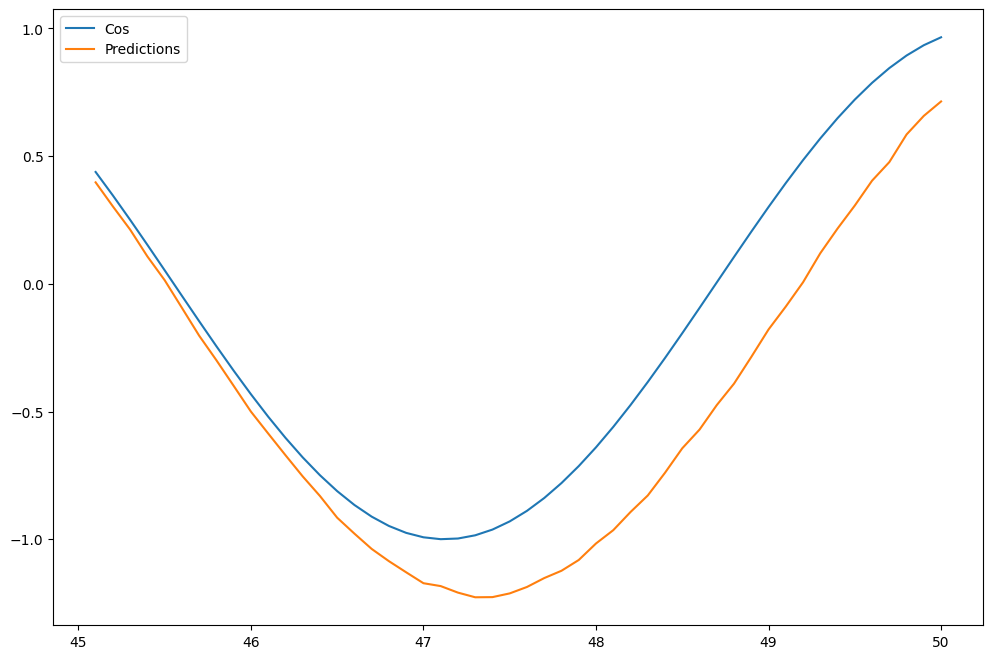

In [62]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [68]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

# LSTMS

In [69]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model.fit(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
 13/402 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1696

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


402/402 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0293 - val_loss: 8.4668e-06
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 9.2590e-05 - val_loss: 1.5683e-04
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 2.8564e-04 - val_loss: 0.0016


In [72]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

<ipython-input-73-914eb3146fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

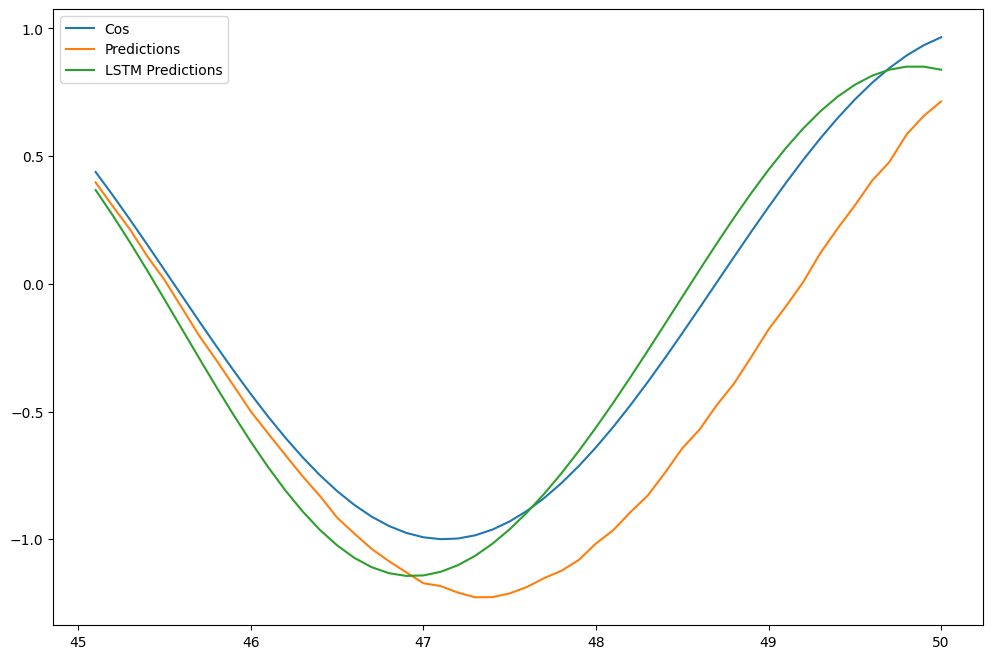

In [73]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [74]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [75]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [77]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/6
 13/451 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2813

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0550
Epoch 2/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 1.9485e-04
Epoch 3/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 3.4395e-04
Epoch 4/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 4.0579e-04
Epoch 5/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 9.7107e-05
Epoch 6/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1.5654e-04


In [78]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

In [79]:
forecast = scaler.inverse_transform(forecast)

In [80]:
# forecast

In [81]:
df

,Cos
0.0,1.000000
0.1,0.995004
0.2,0.980067
0.3,0.955336
0.4,0.921061
...,...
49.6,0.786619
49.7,0.844330
49.8,0.893605
49.9,0.933951


In [82]:
len(forecast)

50

In [83]:
50*0.1

5.0

In [84]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [85]:
len(forecast_index)

50

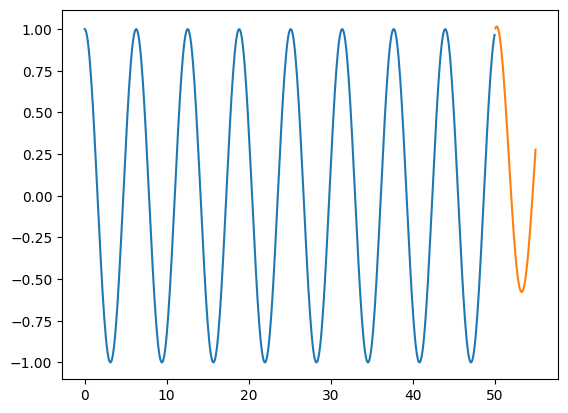

In [88]:
plt.plot(df.index,df['Cos'])
plt.plot(forecast_index,forecast)

# Great Job!